# Customer Segmentation with Clustering 🛍️

**Project Objective:** To use unsupervised machine learning to identify distinct groups of customers within a mall's dataset. By segmenting customers based on multiple dimensions (income, age, spending habits), we can provide rich, actionable insights to the marketing team for highly targeted campaigns.


### Core Concepts:
1.  **Unsupervised Learning:** Understanding the difference between supervised and unsupervised learning.
2.  **Clustering Fundamentals & K-Means:** A deep dive into how the K-Means algorithm works.
3.  **The Elbow Method:** A critical technique for finding the optimal number of clusters (`k`).
4.  **Multi-dimensional EDA:** Exploring relationships between all features using 2D and 3D plots.
5.  **Multiple Segmentation Models:** Building and interpreting different clustering models based on different feature sets.
6.  **Hierarchical Clustering:** A brief introduction to an alternative clustering method.
7.  **Data-Driven Personas:** Translating cluster statistics into actionable business strategies.

### **What is Unsupervised Learning?**

**Unsupervised learning** is different. Here, we work with datasets that **do not have a target variable**. The goal is not to predict a known outcome, but to discover hidden patterns, structures, and relationships within the data itself.

**Clustering** is the most common type of unsupervised learning. The objective is to group data points into clusters, such that points within the same cluster are very similar to each other, and points in different clusters are very dissimilar.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set plot style
sns.set_style('whitegrid')

Imagine you have a bunch of unsorted toys (your data points) and you want to group them into different boxes (your clusters) based on how similar they are. K-Means is like a helper that does this for you!

K-Means Algorithm: Grouping the Toys

* Choose how many boxes you want (Choose k): You decide beforehand how many groups you want to create. Let's say you want 3 boxes (so k=3).
* Place some "toy leaders" in the boxes (Initialize centroids): K-Means randomly picks 3 toys and places one in each box. These toys are the "leaders" or "centroids" of their boxes for now.
* Sort the toys by how close they are to the leaders (Assign points to clusters): K-Means looks at every single toy and figures out which "toy leader" it's closest to. It then puts each toy into the box with the closest leader.
* Find the new average location of the leaders (Update centroids): Once all the toys are in boxes, K-Means calculates the average location of all the toys in each box. These average locations become the new "toy leaders" or centroids.
* Repeat steps 3 and 4 until the leaders stop moving (Iterate until convergence): K-Means keeps repeating the sorting and leader-finding steps. It does this until the "toy leaders" don't move much anymore, meaning the groups are stable.
Once the algorithm stops, you have your toys sorted into k boxes (clusters), where the toys in each box are generally similar to each other.

In [2]:
# Load the dataset from the user-provided file
df = pd.read_csv('../Data/Mall_Customers.csv')

print("Dataset loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Dataset loaded successfully.
Data shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis (EDA)

In [3]:
print("Dataset Info:")
df.info()

# Drop the CustomerID as it's just an identifier and not useful for clustering
df.drop('CustomerID', axis=1, inplace=True)

print("\nDescriptive Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Descriptive Statistics:
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     4

## Univariate Analysis (Feature Distributions)

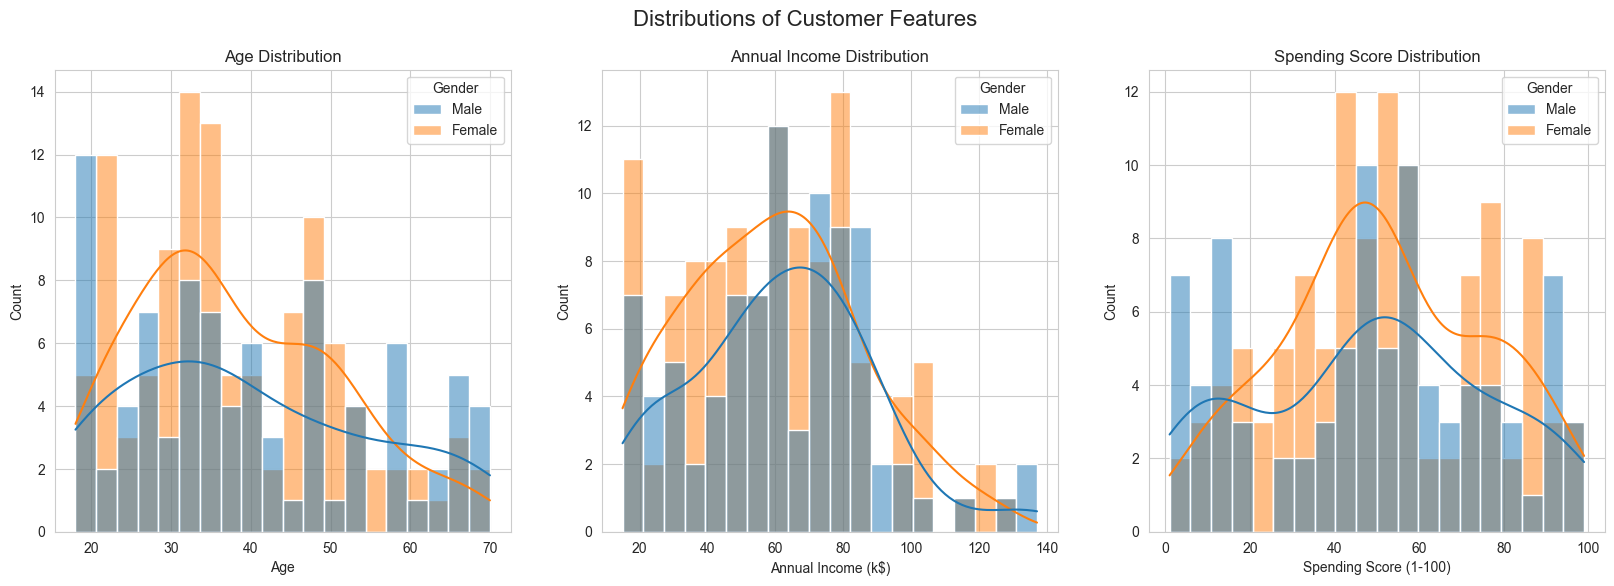

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distributions of Customer Features', fontsize=16)

sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=20, hue='Gender').set_title('Age Distribution')
sns.histplot(ax=axes[1], data=df, x='Annual Income (k$)', kde=True, bins=20, hue='Gender').set_title('Annual Income Distribution')
sns.histplot(ax=axes[2], data=df, x='Spending Score (1-100)', kde=True, bins=20, hue='Gender').set_title('Spending Score Distribution')

plt.show()

## Bivariate Analysis (Looking for Relationships)

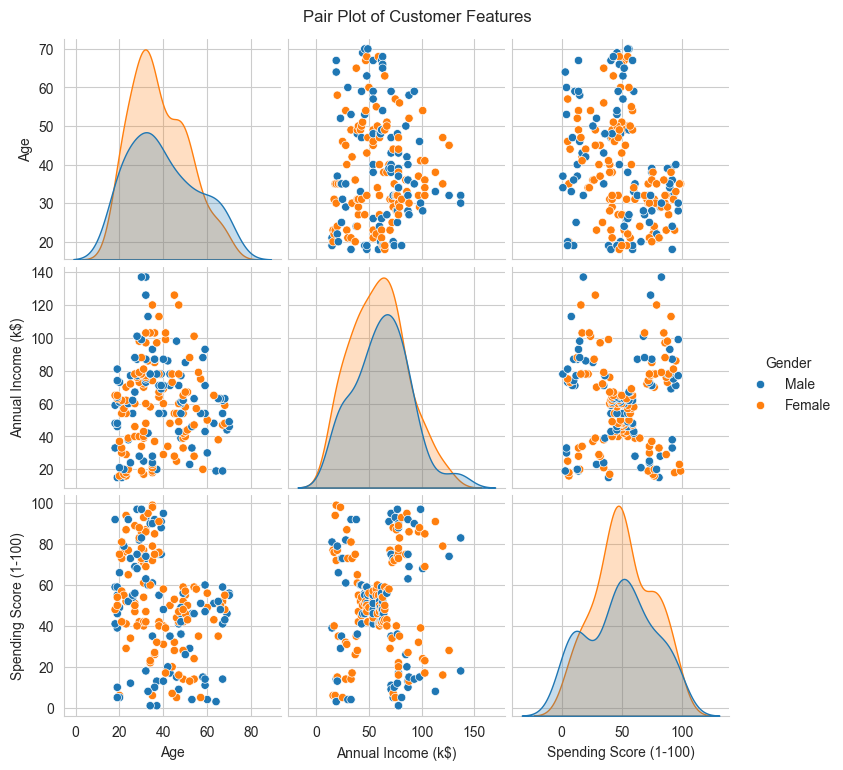

In [5]:
# Using pairplot to visualize relationships between all numerical variables
sns.pairplot(df, vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], hue='Gender', diag_kind='kde')
plt.suptitle('Pair Plot of Customer Features', y=1.02)
plt.show()

- The **`Annual Income` vs. `Spending Score`** plot is the most revealing. It clearly shows distinct, blob-like groups, making it the perfect candidate for clustering.
- The **`Age` vs. `Spending Score`** plot shows some patterns but they are less defined. We see a concentration of high-spending customers in the younger age brackets.
- `Gender` does not appear to be a strong separating factor in any of these plots, as the distributions for males and females largely overlap.

## Exploring Gender vs. Spending Score

In [6]:
gender_summary = df.groupby('Gender')['Spending Score (1-100)'].describe()
print("Spending Score by Gender:\n", gender_summary)

Spending Score by Gender:
         count       mean       std  min   25%   50%   75%   max
Gender                                                         
Female  112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0
Male     88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0


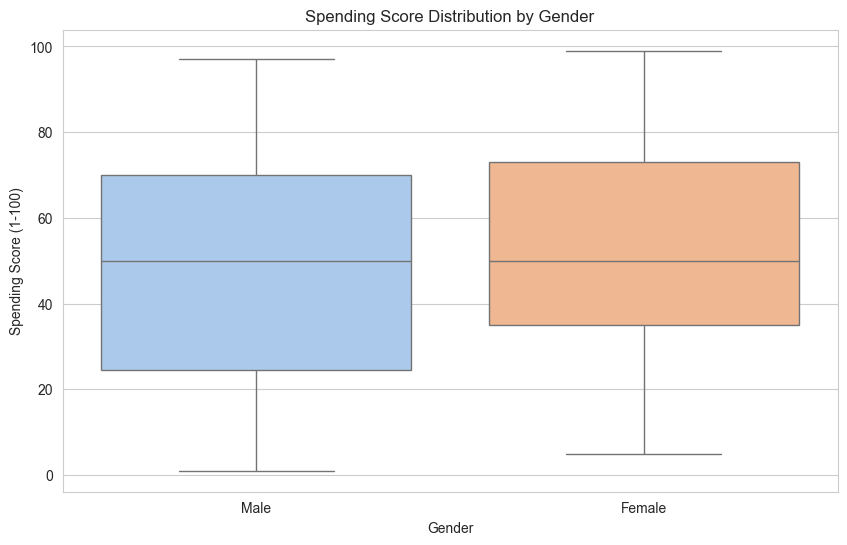

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Gender", y="Spending Score (1-100)", palette="pastel", hue="Gender")
plt.title("Spending Score Distribution by Gender")
plt.show()

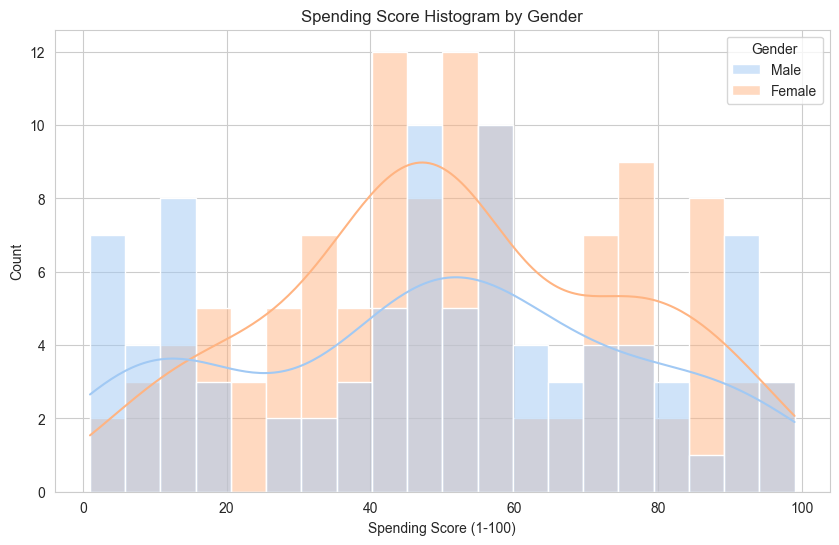

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Spending Score (1-100)', hue='Gender', bins=20, kde=True, palette='pastel')
plt.title('Spending Score Histogram by Gender')
plt.show()

**Insights:**

- Average Spending: Females spend slightly more on average (51.5) than males (48.5), but the difference is small (~3 points).

- Median Spending: Both genders have the same median (50), suggesting similar central tendency.

- Spread of Spending: 
  - Males have a wider spread (Std ~27.9 vs 24.1 for females).

  - The interquartile range (25%–75%) is also slightly larger for males (24.5–70) vs females (35–73).

  - This means male spending is more variable; females are slightly more consistent.

- Extremes: Both genders have high and low spenders, but male minimum is lower (1) vs female minimum (5).

## 3D Visualization

In [9]:
fig = px.scatter_3d(
    df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    z="Age",
    color="Gender",
    title="3D View of Customer Data",
)
fig.show()

## Segmentation Model 1 - Income & Spending Score
This is our primary segmentation model, focusing on the most promising features identified in the EDA.

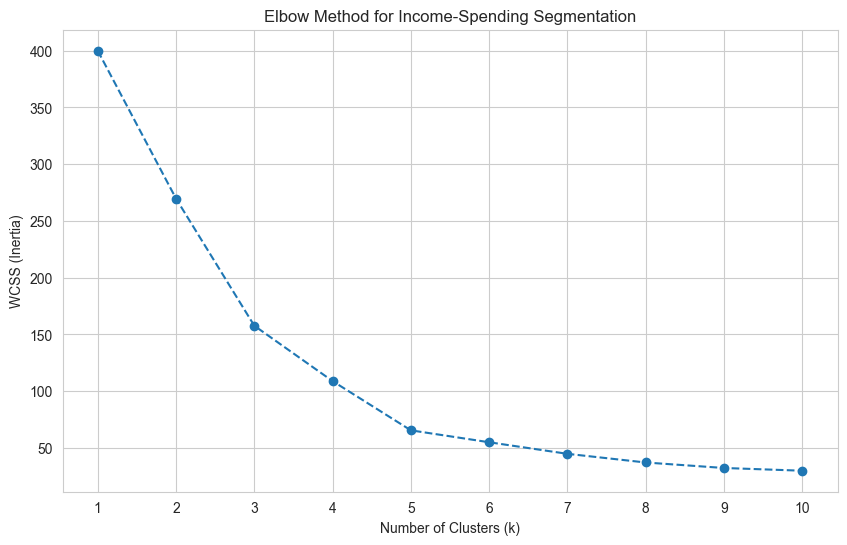

In [10]:
# 1. Select and scale the features
X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

# 2. Implement the Elbow Method
wcss1 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X1_scaled)
    wcss1.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss1, marker='o', linestyle='--')
plt.title('Elbow Method for Income-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

**Observation:** The "elbow" of the curve is clearly at **k=5**. The WCSS decreases sharply until k=5, and then the rate of decrease flattens out. This confirms our visual intuition from the scatter plot!

In [11]:
# Build and fit the final model
kmeans1 = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Income_Cluster'] = kmeans1.fit_predict(X1_scaled)

## Visualizing and Interpreting the Income-Based Segments

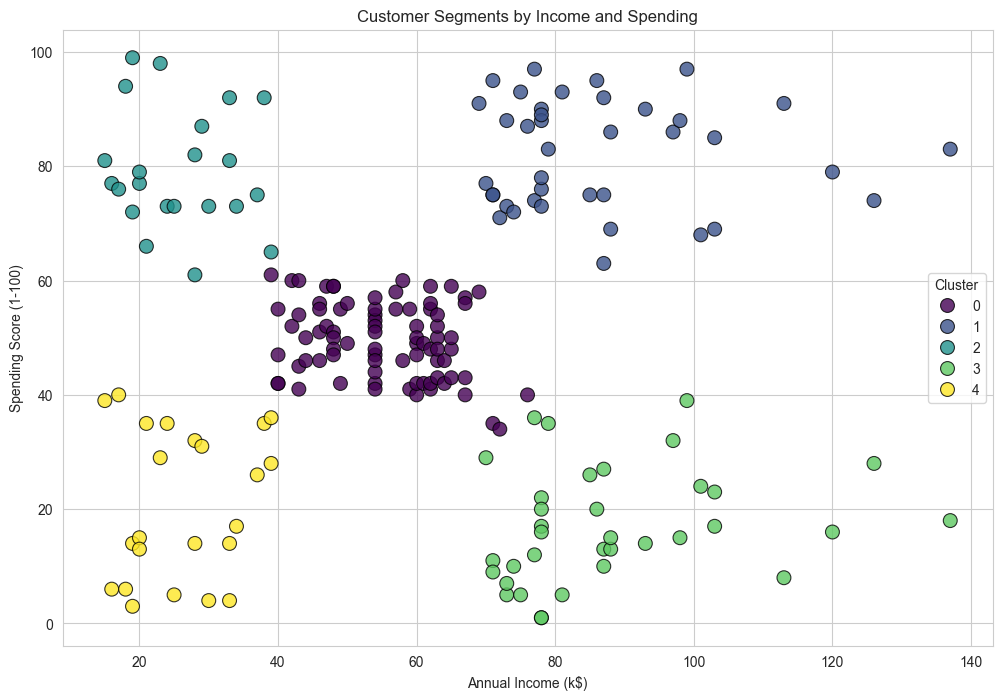

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Income_Cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Income and Spending')
plt.legend(title='Cluster')
plt.show()

In [13]:
# Quantitative Persona Analysis
cluster_profiles1 = df.groupby('Income_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profiles1['Size'] = df['Income_Cluster'].value_counts()
print("--- Income-Based Cluster Profiles ---")
cluster_profiles1

--- Income-Based Cluster Profiles ---


,Age,Annual Income (k$),Spending Score (1-100),Size
Income_Cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


## Segmentation Model 2 - Age & Spending Score
Let's create a different segmentation model to see if we can find age-related customer groups.

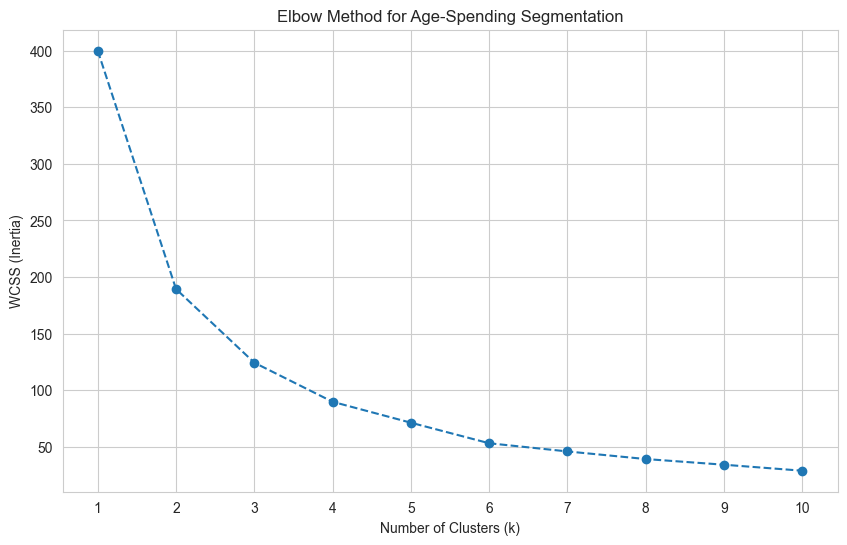

In [14]:
# 1. Select and scale the features
X2 = df[['Age', 'Spending Score (1-100)']]
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# 2. Implement the Elbow Method
wcss2 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X2_scaled)
    wcss2.append(kmeans.inertia_)

# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss2, marker='o', linestyle='--')
plt.title('Elbow Method for Age-Spending Segmentation')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(range(1, 11))
plt.show()

**Observation:** The elbow is less sharp here, **k=3** 

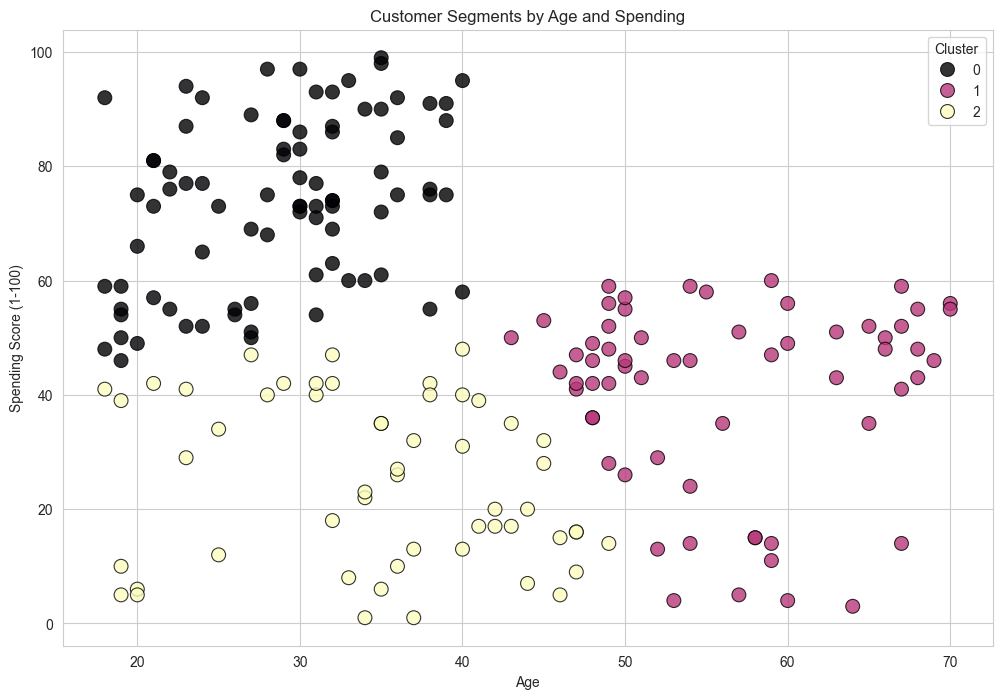

In [15]:
# Build and fit the final model for age segmentation
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
df['Age_Cluster'] = kmeans2.fit_predict(X2_scaled)

# Visualize the new clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)',
                hue='Age_Cluster', palette='magma', s=100, alpha=0.8, edgecolor='black')
plt.title('Customer Segments by Age and Spending')
plt.legend(title='Cluster')
plt.show()

## Feature Engineering for Clustering

By combining the Annual Income of an individual and their Spending Score we can captures a customer’s overall spending potential.

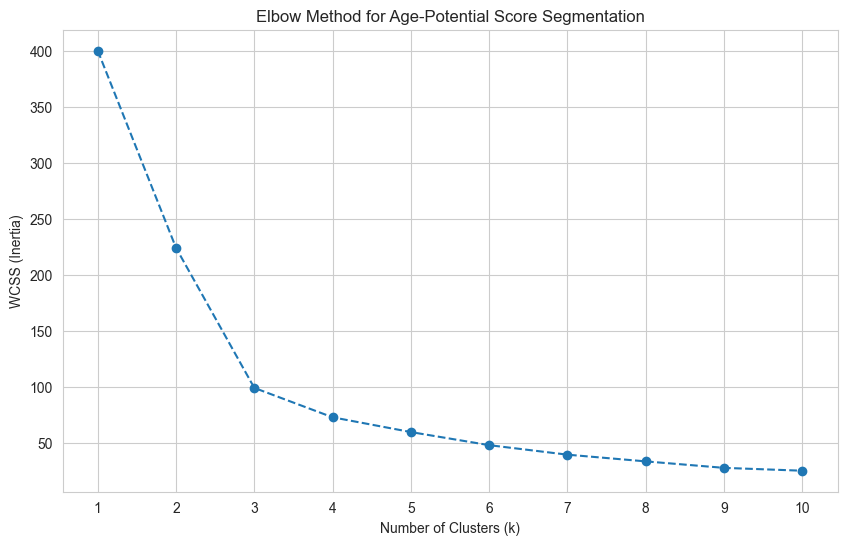

In [16]:
# new feature: Potential Score = Annual Income * Spending Score
df["Potential_Score"] = df["Annual Income (k$)"] * df["Spending Score (1-100)"]

# Scale the features for clustering
X3 = df[["Age", "Potential_Score"]]
scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

# Determine optimal clusters using the Elbow Method
wcss3 = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
    kmeans.fit(X3_scaled)
    wcss3.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss3, marker="o", linestyle="--")
plt.title("Elbow Method for Age-Potential Score Segmentation")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.xticks(range(1, 11))
plt.show()

**Observation:** `k=3` gives big dip and it is a good choice, but `k=4` also seems valid. Hence, plotting both `k=3` and `k=4`.

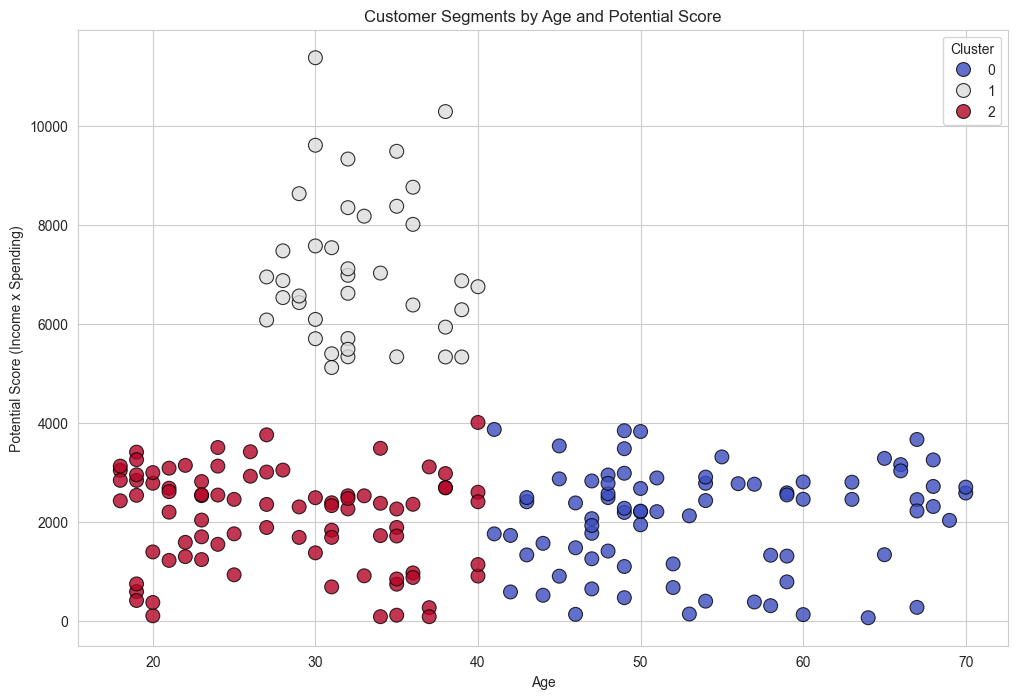

In [17]:
# Fit K-Means using Age + Potential_Score
kmeans3 = KMeans(n_clusters=3, init="k-means++", random_state=42, n_init=10)
df["Potential_Cluster"] = kmeans3.fit_predict(X3_scaled)

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="Age",
    y="Potential_Score",
    hue="Potential_Cluster",
    palette="coolwarm",
    s=100,
    alpha=0.8,
    edgecolor="black",
)
plt.title("Customer Segments by Age and Potential Score")
plt.xlabel("Age")
plt.ylabel("Potential Score (Income x Spending)")
plt.legend(title="Cluster")
plt.show()

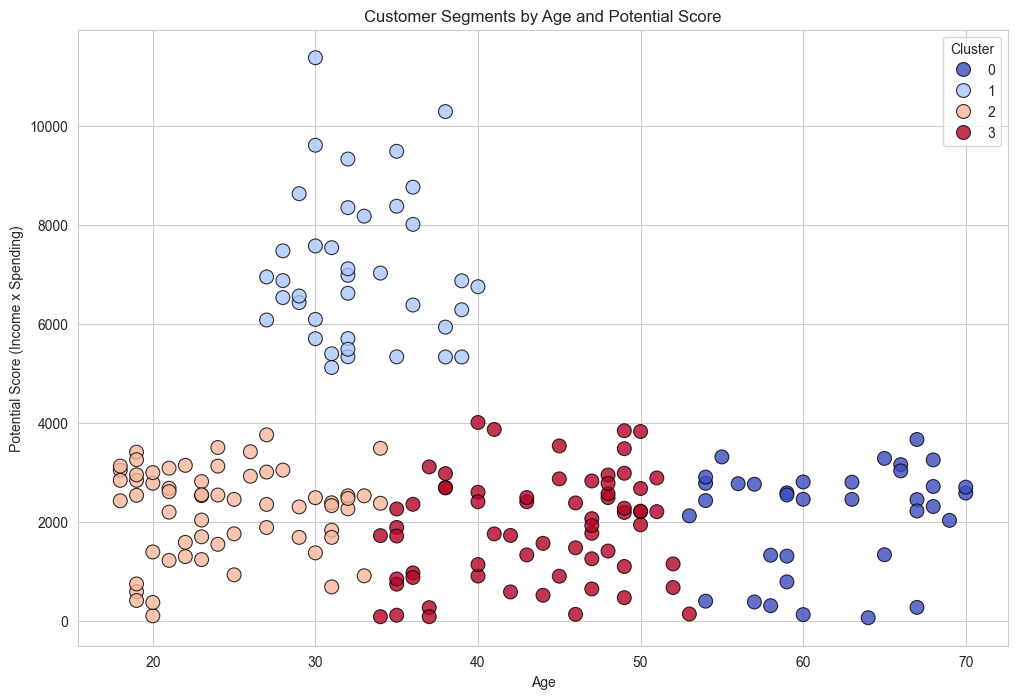

In [18]:
# Fit K-Means using Age + Potential_Score
kmeans3 = KMeans(n_clusters=4, init="k-means++", random_state=42, n_init=10)
df["Potential_Cluster"] = kmeans3.fit_predict(X3_scaled)

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="Age",
    y="Potential_Score",
    hue="Potential_Cluster",
    palette="coolwarm",
    s=100,
    alpha=0.8,
    edgecolor="black",
)
plt.title("Customer Segments by Age and Potential Score")
plt.xlabel("Age")
plt.ylabel("Potential Score (Income x Spending)")
plt.legend(title="Cluster")
plt.show()

As we can see easily in `k=3` plot that there are 3 clusters:
- low score & low age
- low score & high age
- high score & low age

Meanwhile in `k=4` plot that there are:
- low score & low age
- low score & medium age
- low score & high age
- high score & low age

> **Note:** maybe the 4th cluster seems to be forced